## Univariate Analysis
### Missing Values (Graphical)
## Explanation:
### We visualize missing values graphically.
### A dataset without missing values will show only white cells.

## Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load dataset
df = pd.read_csv("C:\\Users\\Shashi yaduvanshi\\Downloads\\winequality-white.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Display last 5 rows

In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


## Dataset Shape, Columns, and Missing Values
### Explanation:
### shape → total rows and columns
### dtypes → column data types (important for analysis)
### isnull().sum() → checks for missing values in each column

In [4]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (4898, 12)

Data types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Missing Values Map
### Explanation:
#### We create a missing-value heatmap. If there are missing values, they will appear as dark lines.

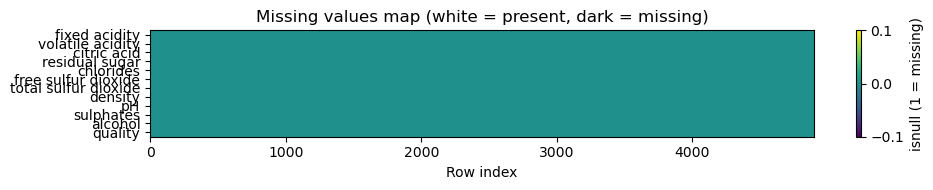

In [5]:
plt.figure(figsize=(10, 2))
plt.imshow(df.isnull().T, aspect="auto", interpolation='nearest')
plt.yticks(range(df.shape[1]), df.columns)
plt.xlabel("Row index")
plt.title("Missing values map (white = present, dark = missing)")
plt.colorbar(label='isnull (1 = missing)')
plt.tight_layout()
plt.show()

## Summary Statistics
### Explanation:
#### describe() gives count, mean, std deviation, min, Q1, Q2, Q3, and max for each variable. This helps us understand ranges and spot potential outliers.

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


## Outlier Detection using IQR
### Explanation:
#### IQR = Q3 – Q1
#### Outliers are values outside [Q1 – 1.5*IQR, Q3 + 1.5*IQR]
#### We calculate and count outliers for each variable.

In [7]:
iqr_info = []
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outlier_count = df[(df[col] < lower) | (df[col] > upper)][col].shape[0]
        iqr_info.append([col, q1, q3, iqr, lower, upper, outlier_count])

iqr_df = pd.DataFrame(iqr_info, columns=["Variable", "Q1", "Q3", "IQR", "Lower Bound", "Upper Bound", "Outlier Count"])
iqr_df

,Variable,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
0,fixed acidity,6.300000,7.3000,1.000000,4.800000,8.800000,119
1,volatile acidity,0.210000,0.3200,0.110000,0.045000,0.485000,186
2,citric acid,0.270000,0.3900,0.120000,0.090000,0.570000,270
3,residual sugar,1.700000,9.9000,8.200000,-10.600000,22.200000,7
4,chlorides,0.036000,0.0500,0.014000,0.015000,0.071000,208
5,free sulfur dioxide,23.000000,46.0000,23.000000,-11.500000,80.500000,50
6,total sulfur dioxide,108.000000,167.0000,59.000000,19.500000,255.500000,19
7,density,0.991723,0.9961,0.004377,0.985156,1.002666,5
8,pH,3.090000,3.2800,0.190000,2.805000,3.565000,75
9,sulphates,0.410000,0.5500,0.140000,0.200000,0.760000,124


## Histograms + KDE for Each Variable
### Explanation:
#### Histograms show distribution; KDE (Kernel Density Estimate) shows smooth curves of data distribution. 
#### Helps detect skewness (left/right).

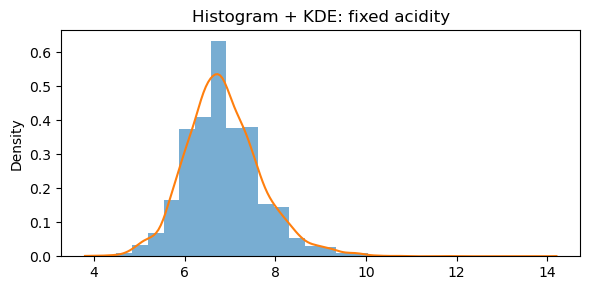

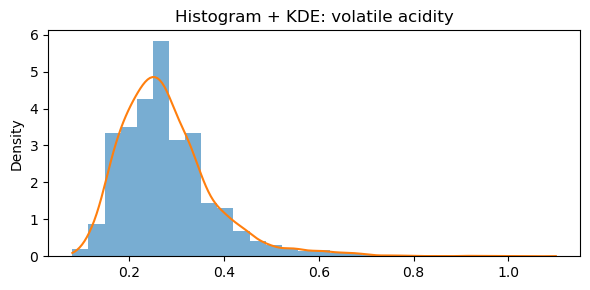

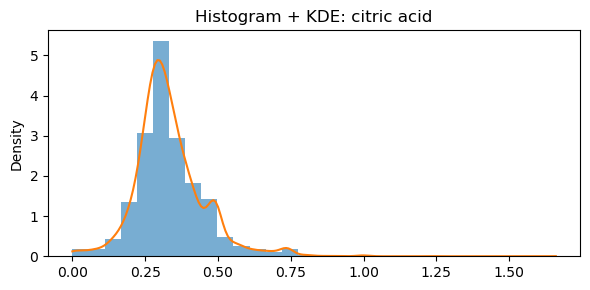

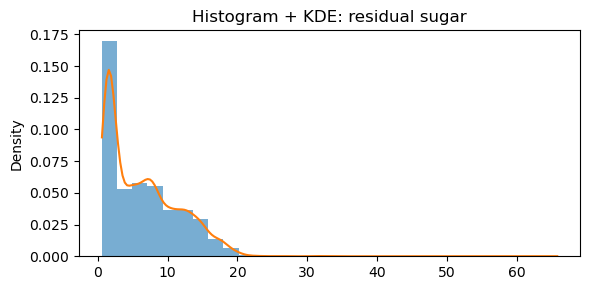

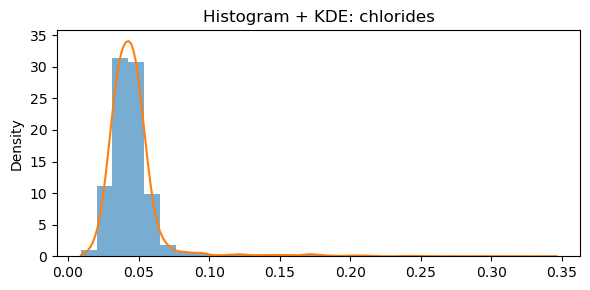

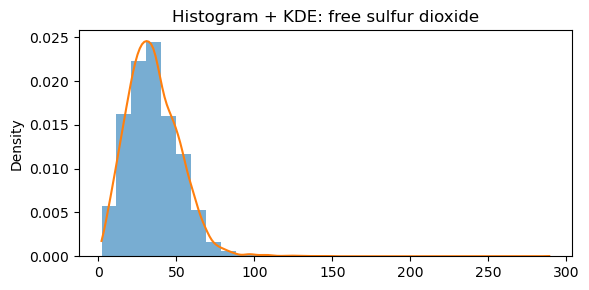

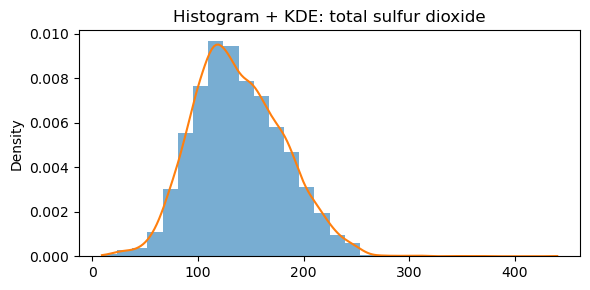

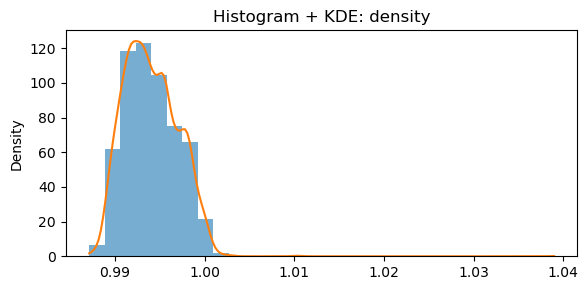

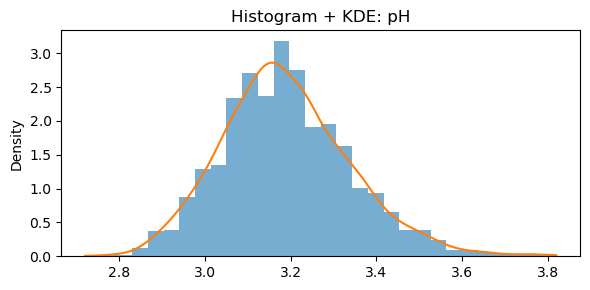

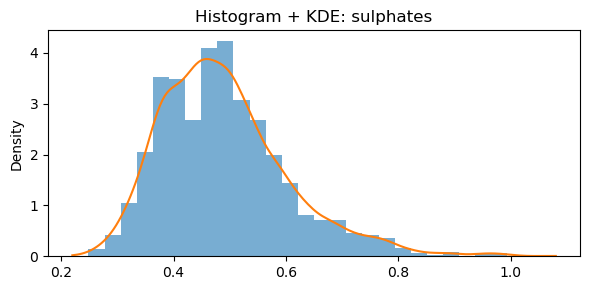

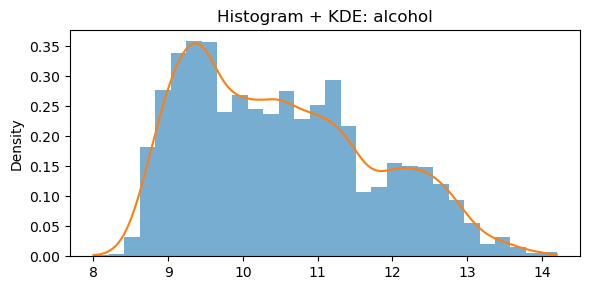

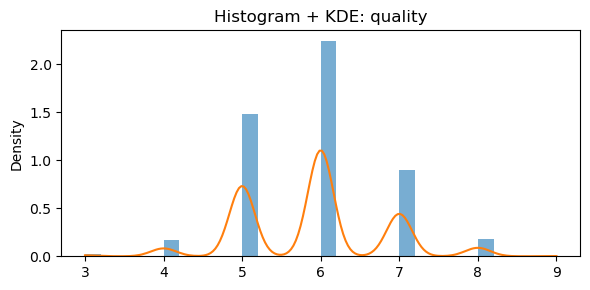

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    series = df[col].dropna()
    plt.figure(figsize=(6,3))
    plt.hist(series, bins=30, density=True, alpha=0.6)
    try:
        kde = gaussian_kde(series)
        xs = np.linspace(series.min(), series.max(), 200)
        plt.plot(xs, kde(xs))
    except:
        series.plot.kde()
    plt.title(f"Histogram + KDE: {col}")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


## Frequency Distribution for Target Variable quality
### Explanation:
#### We count how many wines belong to each quality score and visualize it in a bar chart.

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64


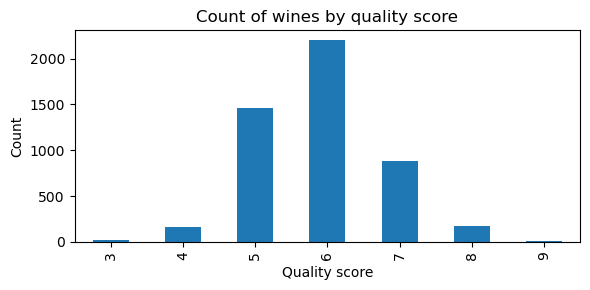

In [9]:
quality_counts = df['quality'].value_counts().sort_index()
print(quality_counts)

plt.figure(figsize=(6,3))
quality_counts.plot(kind='bar')
plt.title("Count of wines by quality score")
plt.xlabel("Quality score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Multivariate Analysis?

### Multivariate analysis is a statistical technique used to examine more than two variables at the same time to understand relationships, patterns, and effects.
### It goes beyond univariate (one variable) and bivariate (two variables) analysis to handle complex data involving multiple variables.
### Example:
### If you want to study how age, income, education level, and spending habits together affect customer purchasing behavior, you need multivariate analysis.

## Boxplots for Each Variable
### Explanation:
#### Boxplots show median, quartiles, and outliers. The whiskers extend to 1.5 × IQR.

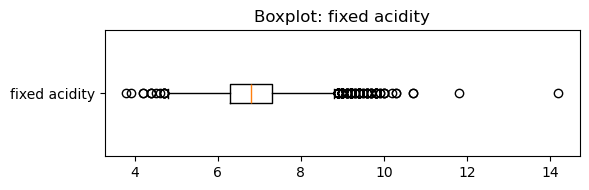

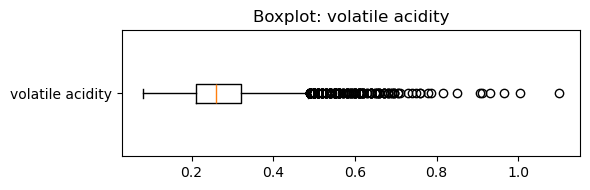

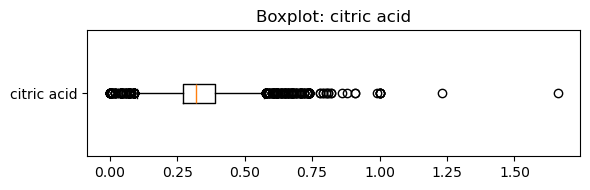

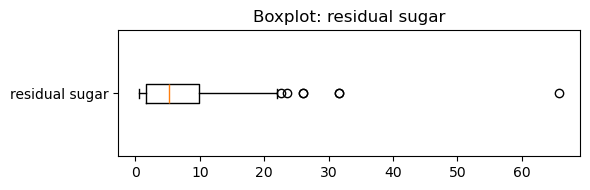

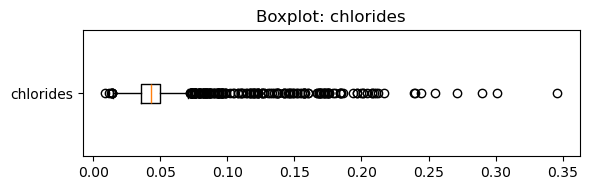

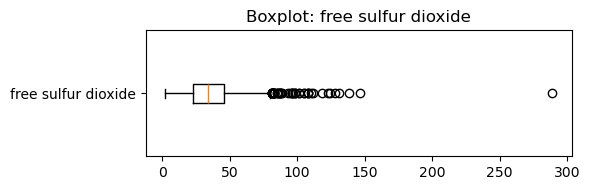

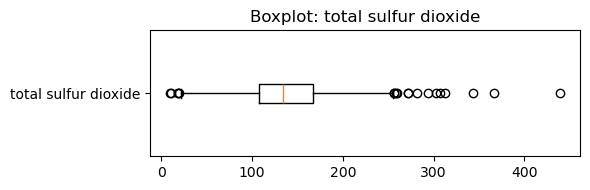

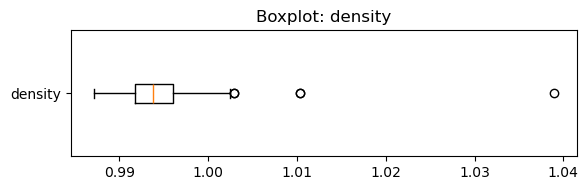

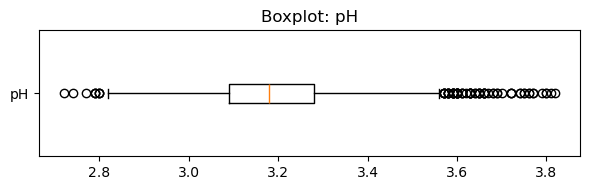

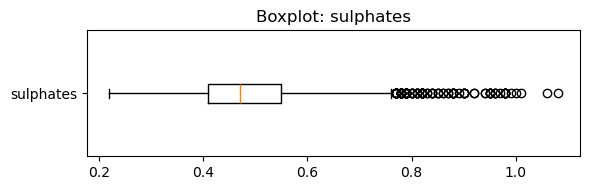

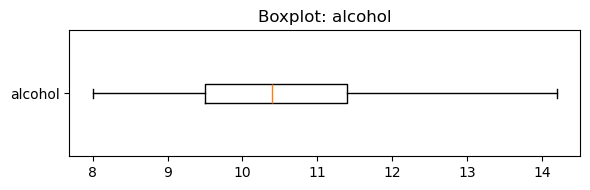

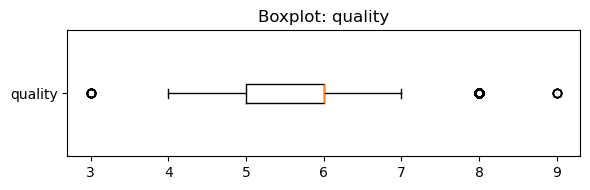

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(6,2))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.yticks([1], [col])
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()


## Correlation Matrix
### Explanation:
#### Correlation measures how strongly variables are related (values close to +1 or –1 show strong relation). 
#### We use a heatmap for visualization.

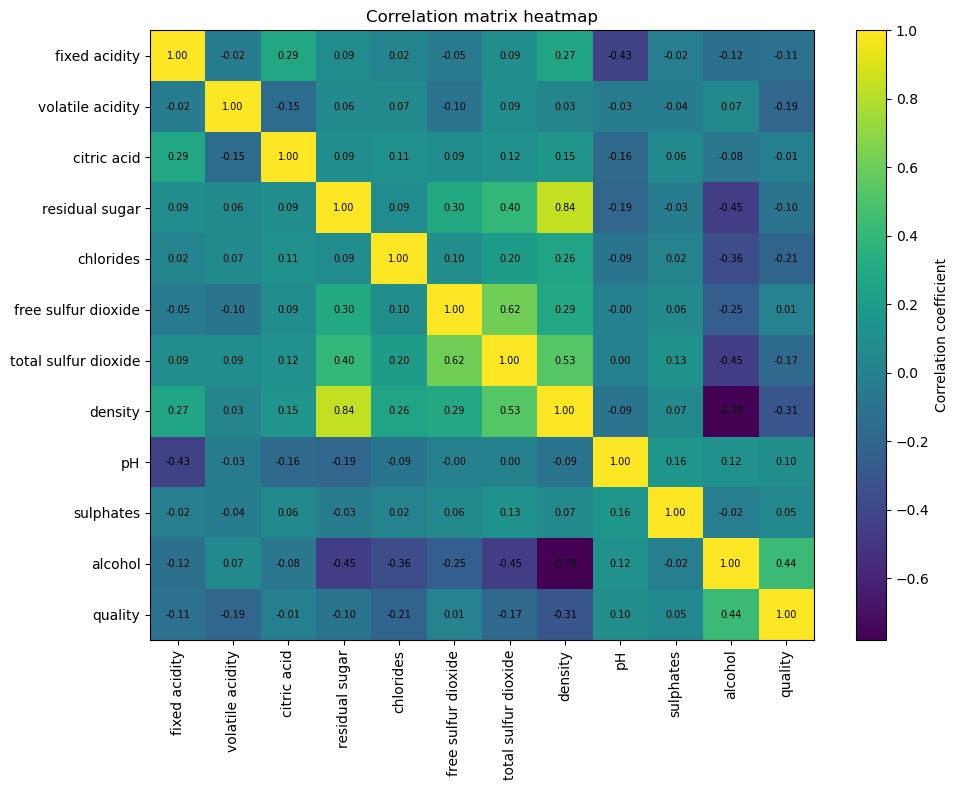

In [11]:
corr = df.corr()

plt.figure(figsize=(10,8))
cax = plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar(cax, label='Correlation coefficient')

for (i, j), val in np.ndenumerate(corr.values):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=7)

plt.title("Correlation matrix heatmap")
plt.tight_layout()
plt.show()


## Observations:
#### Dataset size: 4898 rows, 12 columns (confirmed during run).
#### Missing values: zero (the printed df.isnull().sum() showed zeros for all columns).
#### Distributions: many chemical measurements (like fixed acidity, residual sugar, alcohol) typically show skew — histograms + KDE plots will show whether skew is right/left or multimodal.
#### Outliers: IQR table lists outlier counts per column — include that table in your report and comment on whether outliers are measurement errors or true extremes. For example, residual sugar often has notable outliers in wine datasets.
#### Quality distribution: show frequency table & bar chart; often quality is concentrated on a few integer scores (e.g., 5–7). Mention class imbalance if it exists.
#### Correlations: highlight the top absolute correlations (e.g., alcohol vs. quality, density vs. residual sugar, etc.) — use the correlation matrix to pick features to inspect further or use in modelling.